## H

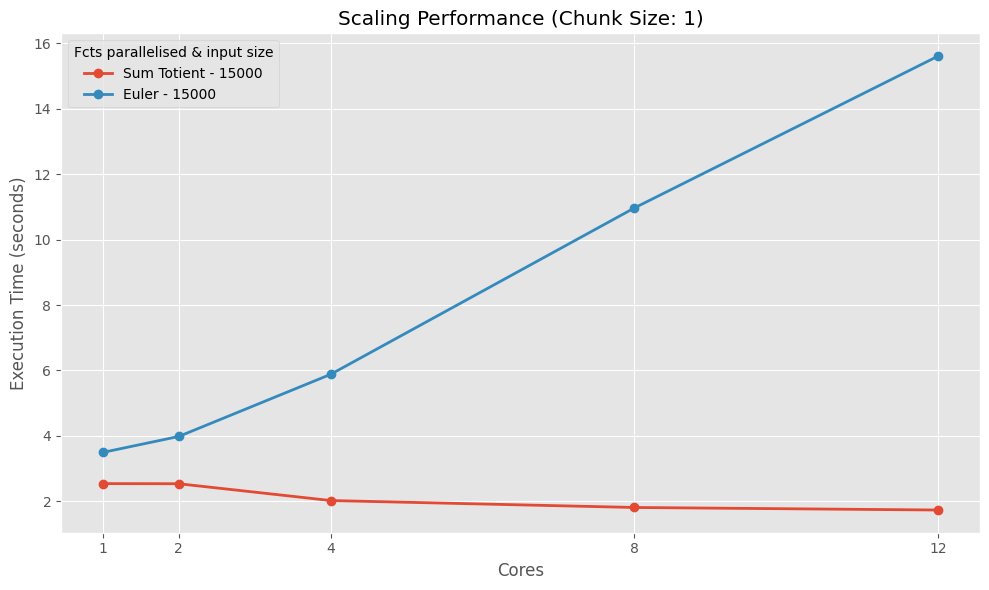

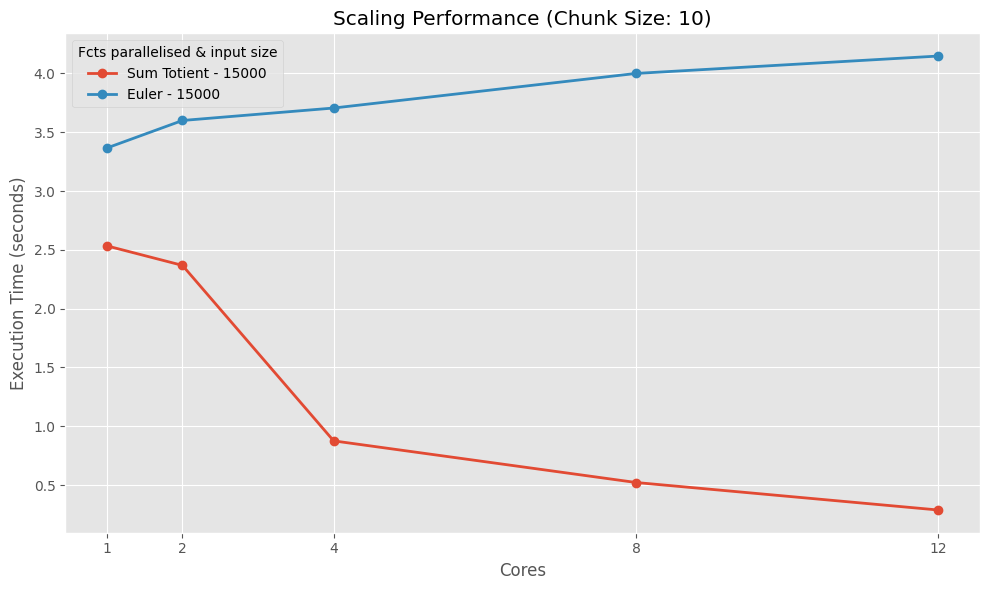

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# 1. LOAD DATA
# I am creating the CSV from the string for demonstration.
# In real usage, you would use: df = pd.read_csv('your_file.csv') 
# Note: I added a few dummy rows above so you can see a line graph. 
# Replace csv_data with your actual file loading.

csv_data = open("runtime.csv")

df = pd.read_csv(io.StringIO(csv_data.read()), skiprows = [1, 2, 3])

# 2. PROCESS DATA
# Calculate mean time across the three runs
df['mean_time_s'] = df[['run1s', 'run2s', 'run3s', 'run4s', 'run5s']].mean(axis=1)
df['mean_time_e'] = df[['run1e', 'run2e', 'run3e', 'run4e', 'run5e']].mean(axis=1)

# Set style
plt.style.use('ggplot')

# 3. GENERATE A GRAPH FOR EACH CHUNK SIZE
chunk_sizes = sorted(df['chunk_size'].unique())

#*

for cs in chunk_sizes:
    plt.figure(figsize=(10, 6))
    
    subset_cs = df[df['chunk_size'] == cs]
    unique_inputs = sorted(subset_cs['input'].unique())
    
    for input_size in unique_inputs:
        # Filter for the specific input size
        data_to_plot = subset_cs[subset_cs['input'] == input_size].sort_values(by='cores')
        
        # --- AXES SWAPPED HERE ---
        # x = cores (Abscissa)
        # y = mean_time (Ordinate)
        plt.plot(data_to_plot['cores'], 
                data_to_plot['mean_time_s'], 
                marker='o', 
                linewidth=2, 
                label=f'Sum Totient - 15000')
        plt.plot(data_to_plot['cores'], 
                data_to_plot['mean_time_e'], 
                marker='o', 
                linewidth=2, 
                label=f'Euler - 15000')
        
    # Updated Labels
    plt.xlabel('Cores')
    plt.ylabel('Execution Time (seconds)')
    plt.title(f'Scaling Performance (Chunk Size: {cs})')
    
    # Optional: Force X-axis to show integer core counts
    plt.xticks(sorted(df['cores'].unique()))
    
    plt.legend(title="Fcts parallelised & input size")
    plt.grid(True)
    plt.tight_layout()
    
    # Show/Save
    plt.show()



#*

In [8]:
df.columns

Index(['15000', '1', '1.1', '2.56', '3.45', '2.54', '3.53', '2.53', '3.50',
       '2.53.1', '3.47', '2.53.2', '3.51'],
      dtype='str')